# Proyek Analisis Data: E Commerce Public Dataset
- **Nama:** Asep Ripa'i
- **Email:** aseprip29@gmail.com
- **ID Dicoding:** asep_ripai29

## Menentukan Pertanyaan Bisnis

- Produk apa yang paling populer?
- Bagaimana performa penjualan dan revenue perusahaan dalam beberapa bulan terakhir?
- Bagaimana Demografi Pelanggan yang Kita Miliki?
_ Produk mana yang paling banyak terjual? Apakah mereka mendapat untung lebih banyak dari produk yang murah atau dari produk yang mahal?

## Import Semua Packages/Library yang Digunakan

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import datetime as dt
from unidecode import unidecode
import matplotlib.image as mpimg
from scipy import stats
import urllib

## Data Wrangling

### Gathering Data

In [2]:
# buat direktori yang menyimpan dataset
dir_data = 'dataset/'

# buka dataset dari masing-masing file
orders = pd.read_csv(dir_data + 'orders_dataset.csv')
items = pd.read_csv(dir_data + 'order_items_dataset.csv')
products = pd.read_csv(dir_data + 'products_dataset.csv')
payments = pd.read_csv(dir_data + 'order_payments_dataset.csv')
reviews = pd.read_csv(dir_data + 'order_reviews_dataset.csv')
customers = pd.read_csv(dir_data + 'customers_dataset.csv')
sellers = pd.read_csv(dir_data + 'sellers_dataset.csv')
geolocation = pd.read_csv(dir_data + 'geolocation_dataset.csv')
category = pd.read_csv(dir_data + 'product_category_name_translation.csv')

data = {'orders': orders,
        'items': items,
        'products': products,
        'payments': payments,
        'reviews': reviews,
        'customers': customers,
        'sellers': sellers,
        'geo': geolocation,
        'category': category}

In [3]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [4]:
items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [5]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [6]:
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [7]:
reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [8]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [9]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [10]:
geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [11]:
category.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


### Assessing Data

### cek info data statis

In [12]:
orders.describe(include='all')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [13]:
items.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [14]:
products.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [15]:
payments.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [16]:
reviews.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [17]:
customers.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [18]:
sellers.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


In [19]:
geolocation.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


In [20]:
category.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


### cek tipe data

In [21]:
for df_item , df in data.items():
  print('\n', data[df_item].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB

 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  

### cek data statis

### cek data missing value

In [22]:
hitung_null = {}

for df_item, df in data.items():
  hitung_null[df_item] = df.isna().sum()
  print(df_item, '\n', hitung_null[df_item], '\n')

orders 
 order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64 

items 
 order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64 

products 
 product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64 

payments 
 order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
d

### cek data duplikat

In [23]:
jumlah_duplikat = {}
total_duplikat_sampel = {}

for df_item, df in data.items():
  jumlah_duplikat[df_item] = df.duplicated().sum()
  total_duplikat_sampel[df_item] = len(df)
  
jumlah_duplikat_df = pd.DataFrame.from_dict(jumlah_duplikat, orient='index', columns=['Jumlah Duplikat'])
total_duplikat_sampel_df = pd.DataFrame.from_dict(total_duplikat_sampel, orient='index', columns=['Total Duplikat Persampel'])

pd.concat([jumlah_duplikat_df,total_duplikat_sampel_df ], axis=1)

,Jumlah Duplikat,Total Duplikat Persampel
orders,0,99441
items,0,112650
products,0,32951
payments,0,103886
reviews,0,99224
customers,0,99441
sellers,0,3095
geo,261831,1000163
category,0,71


### Cleaning Data

### Order

In [24]:
print(data['orders']['order_status'].value_counts())

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64


In [25]:
print('Taking only delivered orders we still get ' +
      str(round((data['orders'].order_status.value_counts()['delivered']/len(data['orders']))*100,2)) +
      '% of data.')

Taking only delivered orders we still get 97.02% of data.


In [26]:
# first I will get all order_id where the order status was delivered
delivered = data['orders']['order_id'][data['orders']['order_status'] != 'delivered'].values

# now filter every other dataframe where order_id is a foreign key
for key, value in data.items():
    if 'order_id' in value.columns:
        value.drop(value.loc[value['order_id'].isin(delivered)].index, inplace = True)

In [27]:
# checking for nans in each dataset
for key, value in data.items():
    for col in value.columns:
        # print only col names where there are nans
        if value[col].isnull().sum():
            print(col + ' (%): ' + str((sum(value[col].isnull())/len(value))*100))

order_approved_at (%): 0.014511080246273761
order_delivered_carrier_date (%): 0.0020730114637533947
order_delivered_customer_date (%): 0.008292045855013579
product_category_name (%): 1.8512336499650999
product_name_lenght (%): 1.8512336499650999
product_description_lenght (%): 1.8512336499650999
product_photos_qty (%): 1.8512336499650999
product_weight_g (%): 0.006069618524475737
product_length_cm (%): 0.006069618524475737
product_height_cm (%): 0.006069618524475737
product_width_cm (%): 0.006069618524475737
review_comment_title (%): 88.36873839001255
review_comment_message (%): 59.4244559520968


In [28]:
# we can drop them the same way as before
# first I will get all order_id where the order status was delivered
null_deliveries = data['orders']['order_id'][data['orders']['order_delivered_customer_date'].isnull()].values

# now filter every other dataframe where order_id is a foreign key
for key, value in data.items():
    if 'order_id' in value.columns:
        value.drop(value.loc[value['order_id'].isin(null_deliveries)].index, inplace = True)

In [29]:
# Mari kita bahas terlebih dulu tentang pesanan nans
# Saya telah mengamati bahwa nans dalam daftar pesanan ini tidak benar-benar tumpang tindih, dan satu-satunya yang benar-benar saya
# yang benar-benar saya pedulikan adalah tanggal_pengiriman_pelanggan.
print('There are only ' + str(data['orders'].order_delivered_customer_date.isnull().sum()) +
      ' orders that are missing delivery dates.')

There are only 0 orders that are missing delivery dates.


In [30]:
# I'm not particularly interested in the actual date of delivery, but more if it was delivered on time
data['orders']['delivered_on_time'] = np.where(data['orders']['order_delivered_customer_date'] < data['orders']['order_estimated_delivery_date'], 'On Time', 'Late')

In [31]:
orders_col=[
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date'
]
for col in orders_col:
    orders[col]=pd.to_datetime(orders[col])

### Reviews

In [32]:
order_review_col=['review_creation_date','review_answer_timestamp']
for col in order_review_col:
     reviews[col]=pd.to_datetime(reviews[col])

In [33]:
reviews[reviews.review_comment_title.isna()]


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01,2018-07-02 12:59:13


In [34]:
print('Review cols: ' , data['reviews'].columns.values)

# the review_comment_title column is 88% NaN so i'll just drop it.
# TODO: nans for reviews just means there are none (?).
# So maybe just assume that's all there is and use the data separately for a etxt analysis (in M3) ENDTODO

# and when the review was sent to the customer
review_drop_cols = ['review_comment_title']
data['reviews'].drop(review_drop_cols, axis= 1, inplace= True)

Review cols:  ['review_id' 'order_id' 'review_score' 'review_comment_title'
 'review_comment_message' 'review_creation_date' 'review_answer_timestamp']


In [35]:
# for now I won't do any text analysis so I'm not super interested in the comment message
# it looks like in this column there are nans if people did not leave a review
# I don't want to drop the column, so I will just replace nan by 0 and the review by 1
data['reviews']['review_comment_message'] = np.where(data['reviews']['review_comment_message'].isnull(), 0, 1)

In [36]:
reviews.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

### products

In [37]:
print('Product cols: ' , data['products'].columns.values)

# I've decided I'm not interested in the length of the name or the description of the product (too many nans)
# also I can't think of anything to do with the size attributes of each product
product_drop_cols = ['product_name_lenght',
                     'product_description_lenght',
                     'product_weight_g',
                     'product_length_cm',
                     'product_height_cm',
                     'product_width_cm']

data['products'].drop(product_drop_cols, axis= 1, inplace= True)

Product cols:  ['product_id' 'product_category_name' 'product_name_lenght'
 'product_description_lenght' 'product_photos_qty' 'product_weight_g'
 'product_length_cm' 'product_height_cm' 'product_width_cm']


In [38]:
# after looking at a gigantic list of categories for products
# I think it's safe to assume that I can replace nans in these columns by 'other'
data['products']['product_category_name'].fillna(value='outro', inplace=True)

In [39]:
# setelah melihat daftar kategori produk yang sangat banyak
# Saya rasa aman untuk mengasumsikan bahwa saya dapat mengganti nans di kolom ini dengan 'other'
data['products']['product_category_name'].fillna(value='other', inplace=True)

In [40]:

data['products']['product_photos_qty'].fillna(value=0, inplace=True)

In [41]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   product_id             32951 non-null  object 
 1   product_category_name  32951 non-null  object 
 2   product_photos_qty     32951 non-null  float64
dtypes: float64(1), object(2)
memory usage: 772.4+ KB


In [42]:
order_item_col=['shipping_limit_date']
for col in order_item_col:
    items[col]=pd.to_datetime(items[col])

### Geo

In [43]:
geolocation.drop_duplicates(inplace=True)

In [44]:
geolocation.duplicated().sum()

0

## Exploratory Data Analysis (EDA)

### Explore Customer

### mengetahui asal daerah customer terbanyak

In [45]:

customers.groupby(by='customer_city')['customer_id'].nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64

In [46]:
customers.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

### Explore Orders

In [47]:
data['orders'].sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivered_on_time
22972,7f4eea789244d8b7281f619104c82bca,61c9573dec61bde3d187a5bc5ce3c1f3,delivered,2018-07-21 14:30:40,2018-07-24 11:33:03,2018-07-24 16:22:00,2018-07-27 19:37:53,2018-08-01,On Time
48759,a44bccae654f637781e1918da79f4fd2,a7c44f543a326d7f5dfc53649662195f,delivered,2018-06-06 00:49:14,2018-06-06 01:11:12,2018-06-11 14:44:00,2018-06-20 20:38:39,2018-07-20,On Time
65956,b7d6f9e405deaa6ff82ab9d96608482f,396a8539f119f80d6df1065a04cf6595,delivered,2017-04-28 11:50:40,2017-04-28 13:03:51,2017-05-03 12:40:14,2017-05-08 12:50:15,2017-05-22,On Time
62592,8436df70c30e8e11edf5cf2f880edf6e,5ce5850e9f77cf47374442640db701e9,delivered,2018-01-08 21:11:55,2018-01-08 21:19:23,2018-01-10 21:15:52,2018-01-26 23:13:33,2018-02-15,On Time
49619,553d21981eb5d6f2f19c3102cde1832d,976b89f39f6ba6ac98d956bd0a2a4d81,delivered,2017-08-27 19:30:49,2017-08-27 19:45:11,2017-08-29 19:55:55,2017-09-05 21:42:39,2017-09-26,On Time


In [48]:
data['orders']['delivered_on_time'].describe()

count       96470
unique          2
top       On Time
freq        88644
Name: delivered_on_time, dtype: object

### Explore Customer dan Orders

- gabung customers dan orders

In [49]:
customers_orders_df = pd.merge(
  left=data['customers'],
  right=data['orders'],
  how='left',
  left_on='customer_id',
  right_on='customer_id'
)
customers_orders_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivered_on_time
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,On Time
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,On Time
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,Late
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,On Time
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,On Time


- gabung payment dan reviews

In [50]:
payments_reviews_df = pd.merge(
  left=data['payments'],
  right=data['reviews'],
  how='left',
  left_on='order_id',
  right_on='order_id'
)
payments_reviews_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,4ce650e117a5b292bf5ea980a61eb61e,1.0,1.0,2018-05-10,2018-05-15 23:38:00
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,ad2036caca61484fc435d7e673c020f2,5.0,0.0,2018-06-30,2018-07-03 11:23:16
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,bcddfa0f7d2e54cfc74bae4f01b84d92,5.0,1.0,2017-12-19,2017-12-22 17:55:30
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,c37a0e51e5df82bdb55d38ff0ffb6af3,5.0,0.0,2017-12-21,2017-12-21 21:42:31
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,5bc7680443b4ef765fec11a8201eeb0c,5.0,0.0,2017-12-21,2017-12-22 01:10:39


In [51]:
payments_reviews_df.sort_values(by='payment_value', ascending=False)

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp
50839,03caa2c082116e1d31e67e9ae3700499,1,credit_card,1,13664.08,211fa81a22870cc634265ea85b751e40,1.0,1.0,2017-10-18,2017-10-19 13:10:39
33495,736e1922ae60d0d6a89247b851902527,1,boleto,1,7274.88,6b9a600f1bb824da4ca38f65baf42526,1.0,1.0,2018-07-27,2018-07-28 02:36:10
40402,0812eb902a67711a1cb742b3cdaa65ae,1,credit_card,8,6929.31,e2fbd9f0ef7b724c7ecb351601a857e7,5.0,1.0,2017-03-04,2017-03-04 21:40:41
48364,fefacc66af859508bf1a7934eab1e97f,1,boleto,1,6922.21,NaN,NaN,NaN,NaT,NaT
83426,f5136e38d1a14a4dbd87dff67da82701,1,boleto,1,6726.66,1b73e6c7cd135008ebeb18404b776ddc,5.0,0.0,2017-06-06,2017-06-07 19:35:23
...,...,...,...,...,...,...,...,...,...,...
62912,25b5b0ea53b7d5a2d5712a0d9d0b3649,1,credit_card,1,0.01,1d3b22020911ac2b786bc5ab5afb3d3a,5.0,1.0,2017-09-07,2017-09-08 00:31:06
61160,45ed6e85398a87c253db47c2d9f48216,3,voucher,1,0.00,b59cf587845cad9af780a2f839ee6c30,1.0,1.0,2017-06-23,2017-06-27 16:19:05
98277,b23878b3e8eb4d25a158f57d96331b18,4,voucher,1,0.00,f75bfd523e8001ea6c62f86c48fae8a9,5.0,0.0,2017-06-08,2017-06-10 19:28:35
19418,8bcbe01d44d147f901cd3192671144db,4,voucher,1,0.00,3d42038fd2a7d35a88b93cb3e51796a3,4.0,0.0,2018-02-03,2018-02-11 17:34:29


In [52]:
payments_reviews_df.groupby(by='payment_type').agg({
  'order_id': 'nunique',
  'payment_value': ['min', 'max']
})

order_id payment_value          
              nunique           min       max
payment_type                                 
boleto          19191         11.62   7274.88
credit_card     74297          0.01  13664.08
debit_card       1484         13.38   4445.50
voucher          3679          0.00   1839.05

*   gabubg customers_orders & payments_reviews

In [53]:
customers_df = pd.merge(
    left=customers_orders_df,
    right=payments_reviews_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,delivered_on_time,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,On Time,1.0,credit_card,2.0,146.87,88b8b52d46df026a9d1ad2136a59b30b,4.0,0.0,2017-05-26,2017-05-30 22:34:40
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,On Time,1.0,credit_card,8.0,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,0.0,2018-01-30,2018-02-10 22:43:29
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,Late,1.0,credit_card,7.0,157.73,5ad6695d76ee186dc473c42706984d87,5.0,0.0,2018-06-15,2018-06-15 12:10:59
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,On Time,1.0,credit_card,1.0,173.30,059a801bb31f6aab2266e672cab87bc5,5.0,0.0,2018-03-29,2018-04-02 18:36:47
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,On Time,1.0,credit_card,8.0,252.25,8490879d58d6c5d7773f2739a03f089a,5.0,1.0,2018-08-10,2018-08-17 01:59:52


### Explore Geolocation

In [54]:
geolocation

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000155,99965,-28.180655,-52.034367,agua santa,RS
1000156,99950,-28.072188,-52.011272,tapejara,RS
1000157,99950,-28.068864,-52.012964,tapejara,RS
1000158,99950,-28.068639,-52.010705,tapejara,RS


memperbaiki kata são paulo jadi sao paulo

In [55]:
(geolocation['geolocation_city']=='são paulo').sum()

19718

In [56]:
geolocation['geolocation_city']=geolocation['geolocation_city'].apply(lambda x: unidecode(x))

In [57]:
(geolocation['geolocation_city']=='são paulo').sum()

0

In [58]:
geolocation.groupby(by=['geolocation_city','geolocation_state'])['geolocation_zip_code_prefix'].size().sort_values(ascending=False).reset_index()

,geolocation_city,geolocation_state,geolocation_zip_code_prefix
0,sao paulo,SP,99643
1,rio de janeiro,RJ,35175
2,belo horizonte,MG,19474
3,curitiba,PR,11263
4,brasilia,DF,8791
...,...,...,...
6345,jordao,CE,1
6346,silves,AM,1
6347,california da barra (barra do pirai),RJ,1
6348,calheiros,RJ,1


###  Explore items & sellers

*   Merge items & sellers

In [59]:
item_seller_df = pd.merge(
    left=data['items'],
    right=data['sellers'],
    how="left",
    left_on="seller_id",
    right_on="seller_id"
)
item_seller_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR


In [60]:
item_seller_df.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False).head(10)

seller_city
sao paulo         661
curitiba          124
rio de janeiro     92
belo horizonte     65
ribeirao preto     50
ibitinga           49
guarulhos          48
santo andre        44
maringa            40
campinas           40
Name: seller_id, dtype: int64

###  Explore products & category

In [61]:
product_df = pd.merge(
    left=data['products'],
    right=data['category'],
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)
product_df.head()

,product_id,product_category_name,product_photos_qty,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,1.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,1.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,1.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,1.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,4.0,housewares


In [62]:
product_df.groupby(by="product_category_name").product_id.nunique().sort_values(ascending=False).head(10)

product_category_name
cama_mesa_banho           3029
esporte_lazer             2867
moveis_decoracao          2657
beleza_saude              2444
utilidades_domesticas     2335
automotivo                1900
informatica_acessorios    1639
brinquedos                1411
relogios_presentes        1329
telefonia                 1134
Name: product_id, dtype: int64

In [63]:
product_df.groupby(by="product_category_name_english").product_id.nunique().sort_values(ascending=False).head(10)

product_category_name_english
bed_bath_table           3029
sports_leisure           2867
furniture_decor          2657
health_beauty            2444
housewares               2335
auto                     1900
computers_accessories    1639
toys                     1411
watches_gifts            1329
telephony                1134
Name: product_id, dtype: int64

gabung item_seller dan product

In [64]:
sellers_df = pd.merge(
    left=product_df,
    right=item_seller_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
sellers_df.head()

,product_id,product_category_name,product_photos_qty,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,1.0,perfumery,e17e4f88e31525f7deef66779844ddce,1.0,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39,3694.0,sao paulo,SP
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,1.0,art,5236307716393b7114b53ee991f36956,1.0,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99,2955.0,sao paulo,SP
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,1.0,sports_leisure,01f66e58769f84129811d43eefd187fb,1.0,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82,2016.0,sao paulo,SP
3,cef67bcfe19066a932b7673e239eb23d,bebes,1.0,baby,143d00a4f2dde4e0364ee1821577adb3,1.0,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54,13330.0,indaiatuba,SP
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,4.0,housewares,86cafb8794cb99a9b1b77fc8e48fbbbb,1.0,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29,4461.0,sao paulo,SP


In [65]:
payments_reviews_df = pd.merge(
    left=data['payments'],
    right=data['reviews'],
    how="left",
    left_on="order_id",
    right_on="order_id"
)
payments_reviews_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,4ce650e117a5b292bf5ea980a61eb61e,1.0,1.0,2018-05-10,2018-05-15 23:38:00
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,ad2036caca61484fc435d7e673c020f2,5.0,0.0,2018-06-30,2018-07-03 11:23:16
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,bcddfa0f7d2e54cfc74bae4f01b84d92,5.0,1.0,2017-12-19,2017-12-22 17:55:30
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,c37a0e51e5df82bdb55d38ff0ffb6af3,5.0,0.0,2017-12-21,2017-12-21 21:42:31
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,5bc7680443b4ef765fec11a8201eeb0c,5.0,0.0,2017-12-21,2017-12-22 01:10:39


In [66]:
payments_reviews_df.sort_values(by="payment_value", ascending=False)

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp
50839,03caa2c082116e1d31e67e9ae3700499,1,credit_card,1,13664.08,211fa81a22870cc634265ea85b751e40,1.0,1.0,2017-10-18,2017-10-19 13:10:39
33495,736e1922ae60d0d6a89247b851902527,1,boleto,1,7274.88,6b9a600f1bb824da4ca38f65baf42526,1.0,1.0,2018-07-27,2018-07-28 02:36:10
40402,0812eb902a67711a1cb742b3cdaa65ae,1,credit_card,8,6929.31,e2fbd9f0ef7b724c7ecb351601a857e7,5.0,1.0,2017-03-04,2017-03-04 21:40:41
48364,fefacc66af859508bf1a7934eab1e97f,1,boleto,1,6922.21,NaN,NaN,NaN,NaT,NaT
83426,f5136e38d1a14a4dbd87dff67da82701,1,boleto,1,6726.66,1b73e6c7cd135008ebeb18404b776ddc,5.0,0.0,2017-06-06,2017-06-07 19:35:23
...,...,...,...,...,...,...,...,...,...,...
62912,25b5b0ea53b7d5a2d5712a0d9d0b3649,1,credit_card,1,0.01,1d3b22020911ac2b786bc5ab5afb3d3a,5.0,1.0,2017-09-07,2017-09-08 00:31:06
61160,45ed6e85398a87c253db47c2d9f48216,3,voucher,1,0.00,b59cf587845cad9af780a2f839ee6c30,1.0,1.0,2017-06-23,2017-06-27 16:19:05
98277,b23878b3e8eb4d25a158f57d96331b18,4,voucher,1,0.00,f75bfd523e8001ea6c62f86c48fae8a9,5.0,0.0,2017-06-08,2017-06-10 19:28:35
19418,8bcbe01d44d147f901cd3192671144db,4,voucher,1,0.00,3d42038fd2a7d35a88b93cb3e51796a3,4.0,0.0,2018-02-03,2018-02-11 17:34:29


In [67]:
payments_reviews_df.groupby(by="payment_type").agg({
    "order_id": "nunique",
    "payment_value":  ["min", "max"]
})

order_id payment_value          
              nunique           min       max
payment_type                                 
boleto          19191         11.62   7274.88
credit_card     74297          0.01  13664.08
debit_card       1484         13.38   4445.50
voucher          3679          0.00   1839.05

gabung customer_order dan payments_review

In [68]:
customers_df = pd.merge(
    left=customers_orders_df,
    right=payments_reviews_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,delivered_on_time,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,On Time,1.0,credit_card,2.0,146.87,88b8b52d46df026a9d1ad2136a59b30b,4.0,0.0,2017-05-26,2017-05-30 22:34:40
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,On Time,1.0,credit_card,8.0,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,0.0,2018-01-30,2018-02-10 22:43:29
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,Late,1.0,credit_card,7.0,157.73,5ad6695d76ee186dc473c42706984d87,5.0,0.0,2018-06-15,2018-06-15 12:10:59
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,On Time,1.0,credit_card,1.0,173.30,059a801bb31f6aab2266e672cab87bc5,5.0,0.0,2018-03-29,2018-04-02 18:36:47
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,On Time,1.0,credit_card,8.0,252.25,8490879d58d6c5d7773f2739a03f089a,5.0,1.0,2018-08-10,2018-08-17 01:59:52


gabung products & category

In [69]:
product_df = pd.merge(
    left=data['products'],
    right=data['category'],
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)
product_df.head()

,product_id,product_category_name,product_photos_qty,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,1.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,1.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,1.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,1.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,4.0,housewares


In [70]:
product_df.groupby(by="product_category_name").product_id.nunique().sort_values(ascending=False).head(10)

product_category_name
cama_mesa_banho           3029
esporte_lazer             2867
moveis_decoracao          2657
beleza_saude              2444
utilidades_domesticas     2335
automotivo                1900
informatica_acessorios    1639
brinquedos                1411
relogios_presentes        1329
telefonia                 1134
Name: product_id, dtype: int64

In [71]:
product_df.groupby(by="product_category_name_english").product_id.nunique().sort_values(ascending=False).head(10)

product_category_name_english
bed_bath_table           3029
sports_leisure           2867
furniture_decor          2657
health_beauty            2444
housewares               2335
auto                     1900
computers_accessories    1639
toys                     1411
watches_gifts            1329
telephony                1134
Name: product_id, dtype: int64

gabung item_seller_df & product_df

In [72]:
sellers_df = pd.merge(
    left=product_df,
    right=item_seller_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
sellers_df.head()

,product_id,product_category_name,product_photos_qty,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,1.0,perfumery,e17e4f88e31525f7deef66779844ddce,1.0,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39,3694.0,sao paulo,SP
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,1.0,art,5236307716393b7114b53ee991f36956,1.0,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99,2955.0,sao paulo,SP
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,1.0,sports_leisure,01f66e58769f84129811d43eefd187fb,1.0,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82,2016.0,sao paulo,SP
3,cef67bcfe19066a932b7673e239eb23d,bebes,1.0,baby,143d00a4f2dde4e0364ee1821577adb3,1.0,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54,13330.0,indaiatuba,SP
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,4.0,housewares,86cafb8794cb99a9b1b77fc8e48fbbbb,1.0,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29,4461.0,sao paulo,SP


In [73]:
sellers_df.sort_values(by="price", ascending=False)

,product_id,product_category_name,product_photos_qty,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
20210,489ae2aa008f021502940f251d4cce7f,utilidades_domesticas,2.0,housewares,0812eb902a67711a1cb742b3cdaa65ae,1.0,e3b4998c7a498169dc7bce44e6bb6277,2017-02-16 20:37:36,6735.0,194.31,3635.0,sao paulo,SP
72816,69c590f7ffc7bf8db97190b6cb6ed62e,pcs,4.0,computers,fefacc66af859508bf1a7934eab1e97f,1.0,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.0,193.21,86026.0,londrina,PR
48744,1bdf5e6731585cf01aa8169c7028d6ad,artes,2.0,art,f5136e38d1a14a4dbd87dff67da82701,1.0,ee27a8f15b1dded4d213a468ba4eb391,2017-06-15 02:45:17,6499.0,227.66,74210.0,goiania,GO
70764,a6492cc69376c469ab6f61d8f44de961,eletroportateis,2.0,small_appliances,a96610ab360d42a2e5335a3998b4718a,1.0,59417c56835dd8e2e72f91f809cd4092,2017-04-18 13:25:18,4799.0,151.34,13480.0,limeira,SP
31736,c3ed642d592594bb648ff4a04cee2747,eletroportateis,2.0,small_appliances,199af31afc78c699f0dbf71fb178d4d4,1.0,59417c56835dd8e2e72f91f809cd4092,2017-05-09 15:50:15,4690.0,74.34,13480.0,limeira,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110167,5cac6a83708526b99c11e11027ae1ca6,moveis_decoracao,3.0,furniture_decor,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
110244,17c7ec33a1657924ad493e6978b4bf91,bebes,6.0,baby,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
110304,03b10f5e3ef07cfc27a025adca3fd0be,esporte_lazer,1.0,sports_leisure,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
110470,70adb75b3b2e86cffbb697c90867c3f3,moveis_decoracao,2.0,furniture_decor,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN


In [74]:
sellers_df.groupby(by="product_category_name_english").agg({
    "order_id": "nunique",
    "price":  ["min", "max"]
})

order_id  price         
                               nunique    min      max
product_category_name_english                         
agro_industry_and_commerce         177  12.99  2990.00
air_conditioning                   246  10.90  1599.00
art                                195   5.35  6499.00
arts_and_craftmanship               23   9.80   289.49
audio                              348  14.90   598.99
...                                ...    ...      ...
stationery                        2264   2.29  1693.00
tablets_printing_image              79  14.90   889.99
telephony                         4093   5.00  2428.00
toys                              3803   4.90  1699.99
watches_gifts                     5493   8.99  3999.90

[71 rows x 3 columns]

### Explore All Data

gabung semua data

In [75]:
all_data = pd.merge(
    left=customers_df,
    right=sellers_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
all_data.head(20)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_photos_qty,product_category_name_english,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,1.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,8577.0,itaquaquecetuba,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,3.0,housewares,1.0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,88303.0,itajai,SC
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,1.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,8577.0,itaquaquecetuba,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,1.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,8577.0,itaquaquecetuba,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,1.0,home_confort,1.0,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,14940.0,ibitinga,SP
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC,5741ea1f91b5fbab2bd2dc653a5b5099,delivered,2017-09-14 18:14:31,2017-09-14 18:25:11,2017-09-18 21:27:40,...,2.0,sports_leisure,1.0,8f2ce03f928b567e3d56181ae20ae952,2017-09-20 18:25:11,259.90,22.31,5141.0,pirituba,SP
6,fd826e7cf63160e536e0908c76c3f441,addec96d2e059c80c30fe6871d30d177,4534,sao paulo,SP,36e694cf4cbc2a4803200c35e84abdc4,delivered,2018-02-19 14:38:35,2018-02-19 14:50:37,2018-02-20 00:03:39,...,3.0,computers_accessories,1.0,9f505651f4a6abe901a56cdc21508025,2018-02-23 14:50:37,14.99,7.78,4102.0,sao paulo,SP
7,5e274e7a0c3809e14aba7ad5aae0d407,57b2a98a409812fe9618067b6b8ebe4f,35182,timoteo,MG,1093c8304c7a003280dd34598194913d,delivered,2017-11-16 19:29:02,2017-11-16 19:55:41,2017-11-22 16:46:33,...,0.0,NaN,1.0,2a7dc43cecabf23403078e2188437d1d,2017-11-22 19:55:41,19.90,16.11,4142.0,sao paulo,SP
8,5adf08e34b2e993982a47070956c5c65,1175e95fb47ddff9de6b2b06188f7e0d,81560,curitiba,PR,1ebeea841c590e86a14a0d7a48e7d062,delivered,2018-01-18 12:35:44,2018-01-18 12:56:32,2018-01-18 23:25:35,...,5.0,toys,1.0,95e03ca3d4146e4011985981aeb959b9,2018-01-30 12:56:32,25.00,14.10,21210.0,rio de janeiro,RJ
9,4b7139f34592b3a31687243a302fa75b,9afe194fb833f79e300e37e580171f22,30575,belo horizonte,MG,7433cbcc783205509d66a5260da5b574,delivered,2018-01-08 11:22:34,2018-01-08 11:35:27,2018-01-11 01:00:40,...,1.0,furniture_decor,1.0,0241d4d5d36f10f80c644447315af0bd,2018-01-12 11:35:27,99.90,22.57,80330.0,curitiba,PR


In [76]:
all_data_df = all_data.drop_duplicates('order_id')

In [77]:
all_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96471 entries, 0 to 2305341
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer_id                    96471 non-null  object        
 1   customer_unique_id             96471 non-null  object        
 2   customer_zip_code_prefix       96471 non-null  int64         
 3   customer_city                  96471 non-null  object        
 4   customer_state                 96471 non-null  object        
 5   order_id                       96470 non-null  object        
 6   order_status                   96470 non-null  object        
 7   order_purchase_timestamp       96470 non-null  datetime64[ns]
 8   order_approved_at              96456 non-null  datetime64[ns]
 9   order_delivered_carrier_date   96469 non-null  datetime64[ns]
 10  order_delivered_customer_date  96470 non-null  datetime64[ns]
 11  order_estimated_de

In [78]:
all_data.groupby(by="customer_state").agg({
    "order_id": "nunique",
    "payment_value": "sum"
}).sort_values(by="payment_value", ascending=False)

,order_id,payment_value
customer_state,,
SP,40494,7455331.70
RJ,12350,2699623.08
MG,11354,2290457.39
RS,5344,1118250.44
PR,4923,1036003.69
BA,3256,775836.28
SC,3546,769234.50
GO,1957,497367.84
DF,2080,424872.44


In [79]:
all_data.groupby(by="product_category_name_english").agg({
    "order_id": "nunique",
    "review_score":  ["min", "max"]
})

order_id review_score     
                               nunique          min  max
product_category_name_english                           
agro_industry_and_commerce         177          1.0  5.0
air_conditioning                   246          1.0  5.0
art                                195          1.0  5.0
arts_and_craftmanship               23          1.0  5.0
audio                              348          1.0  5.0
...                                ...          ...  ...
stationery                        2264          1.0  5.0
tablets_printing_image              79          1.0  5.0
telephony                         4093          1.0  5.0
toys                              3803          1.0  5.0
watches_gifts                     5493          1.0  5.0

[71 rows x 3 columns]

In [80]:
all_data_df.to_csv("semua_data.csv", index=False)

## Visualization & Explanatory Analysis

### Produk mana yang paling banyak terjual? Apakah mereka mendapat untung lebih banyak dari produk yang murah atau dari produk yang mahal?

In [81]:
# based on the schema, we merge the products dataset with the items dataset
items_product = data['items'].merge(data['products'], on= 'product_id', how= 'inner')
orders_ip = data['orders'].merge(items_product, on='order_id', how='inner')

# pivot table aggregating by # of items bought and mean of price ('will be the same')
product_revenue = orders_ip.pivot_table(index=['product_id'], aggfunc= {'order_item_id': 'sum', 'price':'mean'})
product_revenue['total'] = product_revenue['order_item_id'] * product_revenue['price']
product_revenue.rename(columns={'order_item_id':'sell_probability'}, inplace= True)
product_revenue['sell_probability'] = product_revenue['sell_probability'] / len(product_revenue)
product_revenue.sort_values(by='total', ascending= False)

,sell_probability,price,total
product_id,,,
bb50f2e236e5eea0100680137654686c,0.006643,327.628866,70112.577320
5769ef0a239114ac3a854af00df129e4,0.001118,1680.000000,60480.000000
6cdd53843498f92890544667809f1595,0.004998,350.668627,56457.649020
d1c427060a0f73f6b889a5c7c61f2ac4,0.011082,137.411325,49055.843133
99a4788cb24856965c36a24e339b6058,0.016484,88.154423,46809.998868
...,...,...,...
8a3254bee785a526d548a81a9bc3c9be,0.000124,0.850000,3.400000
2e8316b31db34314f393806fd7b6e185,0.000031,2.990000,2.990000
680cc8535be7cc69544238c1d6a83fe8,0.000031,2.900000,2.900000


*Merencanakan probabilitas penjualan produk, harga, dan pendapatan**

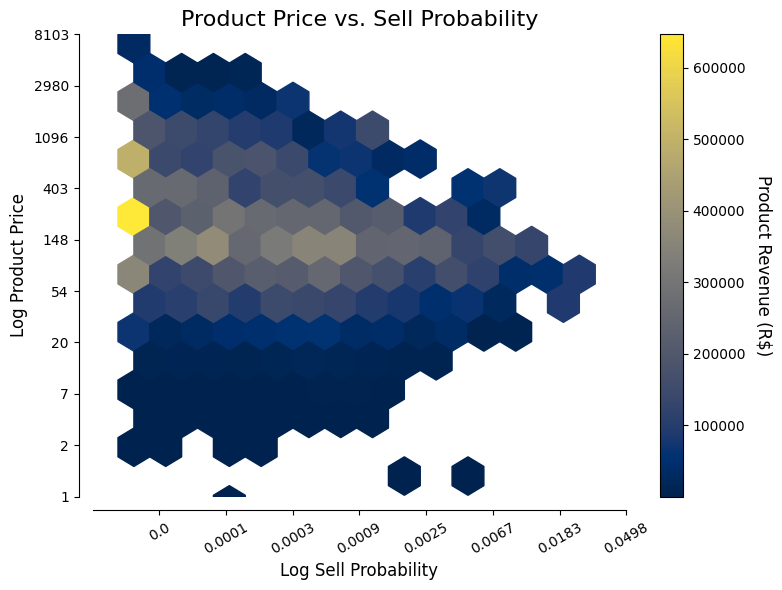

In [82]:
# Custom function to set plot design
def custom_plot(ax, spines):
    for loc, spine in ax.spines.items():
        if loc in spines:
            spine.set_position(('outward', 10))
        else:
            spine.set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

x = np.log(product_revenue.sell_probability)
y = np.log(product_revenue.price)

fig, ax = plt.subplots(figsize=(8, 6))
custom_plot(ax, ['bottom', 'left'])

plt.title('Product Price vs. Sell Probability', fontsize=16)
plt.xlabel('Log Sell Probability', fontsize=12)
plt.ylabel('Log Product Price', fontsize=12)

plt.xlim(-11, -3)
plt.ylim(0, 9)

plt.yticks(range(10), [int(np.exp(x)) for x in range(10)], fontsize=10)
plt.xticks(range(-10, -2), [round(np.exp(x), 4) for x in range(-10, -2)], fontsize=10, rotation=30)

# Use different colormaps and set the number of grids
hb = ax.hexbin(x, y, gridsize=14, C=product_revenue.total, reduce_C_function=np.sum, cmap='cividis')

# Added colorbar
cb = fig.colorbar(hb, ax=ax)
cb.set_label('Product Revenue (R$)', rotation=270, labelpad=20, fontsize=12)

# Customize the layout and save the image
plt.tight_layout()
plt.savefig('dataset/product_probability_sum_custom.png', dpi=300)

plt.show()

###  Which geographic location has the most customers?

In [83]:
other_state_geolocation = data['geo'].groupby(['geolocation_zip_code_prefix'])['geolocation_state'].nunique().reset_index(name='count')
other_state_geolocation[other_state_geolocation['count']>= 2].shape
max_state = data['geo'].groupby(['geolocation_zip_code_prefix','geolocation_state']).size().reset_index(name='count').drop_duplicates(subset = 'geolocation_zip_code_prefix').drop('count',axis=1)

In [84]:
geolocation_silver = data['geo'].groupby(['geolocation_zip_code_prefix','geolocation_city','geolocation_state'])[['geolocation_lat','geolocation_lng']].median().reset_index()
geolocation_silver = geolocation_silver.merge(max_state,on=['geolocation_zip_code_prefix','geolocation_state'],how='inner')

In [85]:
customers_silver = customers_df.merge(geolocation_silver,left_on='customer_zip_code_prefix',right_on='geolocation_zip_code_prefix',how='inner')

In [86]:
customers_silver.head(20)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,review_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp,geolocation_zip_code_prefix,geolocation_city,geolocation_state,geolocation_lat,geolocation_lng
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,88b8b52d46df026a9d1ad2136a59b30b,4.0,0.0,2017-05-26,2017-05-30 22:34:40,14409,franca,SP,-20.502307,-47.396740
1,5dca924cc99eea2dc5ba40d11ec5dd0f,2761fee7f378f0a8d7682d8a3fa07ab1,14409,franca,SP,95261f608a64bbbe760a212b4d48a4ee,delivered,2018-06-15 20:07:13,2018-06-15 20:41:11,2018-06-18 15:52:00,...,16a27e5ffd29a7cdf0e4984b0cab46b7,5.0,0.0,2018-06-22,2018-06-26 19:17:40,14409,franca,SP,-20.502307,-47.396740
2,661897d4968f1b59bfff74c7eb2eb4fc,d06a495406b79cb8203ea21cc0942f8c,14409,franca,SP,9444fa2ab50a3f5af63b48be297eda24,delivered,2017-09-09 15:40:00,2017-09-09 15:50:24,2017-09-11 13:43:41,...,23be511c12a57fe4052555f9c8905d8b,5.0,0.0,2017-09-19,2017-09-20 03:47:39,14409,franca,SP,-20.502307,-47.396740
3,702b62324327ccba20f1be3465426437,8b3d988f330c1d1c3332ccd440c147b7,14409,franca,SP,dceb8e88274c6f42a88a76ed979eb817,delivered,2018-03-26 12:04:55,2018-03-26 12:15:37,2018-03-27 00:54:33,...,e0fd752f37c8c6866ceb53b79b0715f6,5.0,0.0,2018-03-29,2018-04-11 20:07:14,14409,franca,SP,-20.502307,-47.396740
4,bdf997bae7ca819b0415f5174d6b4302,866755e25db620f8d7e81b351a15bb2f,14409,franca,SP,6ee1cea1b2edcc713f83ebfbccbc57f9,delivered,2018-07-29 20:39:20,2018-07-29 20:55:21,2018-07-31 12:39:00,...,51fb9267e6687e5ab21e4539999188ed,5.0,0.0,2018-08-04,2018-08-04 23:20:25,14409,franca,SP,-20.502307,-47.396740
5,48a9965057e1c75ed3a4d511714be18b,2be1bf7d96bccea9775dcd4c5cbde376,14409,franca,SP,dbabdffb9ca50a2b51c3501d849e311b,delivered,2017-06-11 17:20:01,2017-06-11 17:45:15,2017-06-13 09:18:58,...,1991c75dd8acba50a854d1a24a876827,5.0,1.0,2017-06-20,2017-06-21 16:20:42,14409,franca,SP,-20.502307,-47.396740
6,96fbbe8005e67d382b0fc453a288be02,8d153d12b59d763efeb3953822c51862,14409,franca,SP,0add19297766bc00a177a9ae740554eb,delivered,2018-04-01 22:50:57,2018-04-02 22:48:13,2018-04-05 20:49:46,...,bfe227aa0debbceffebfe9f4638dbcc2,2.0,0.0,2018-04-13,2018-04-16 01:14:09,14409,franca,SP,-20.502307,-47.396740
7,7d58157ef9ab184d29d36f009c7ad786,4dd678b3eb5be4a5589f5566ec386e09,14409,franca,SP,40a53ec6d0f15a6e4366a5e07c5f6ce2,delivered,2018-06-16 19:20:49,2018-06-17 19:15:14,2018-06-18 15:11:00,...,fe402e28e225c2b468946a5825d0e494,4.0,0.0,2018-06-21,2018-06-23 21:17:28,14409,franca,SP,-20.502307,-47.396740
8,d3c09791fc7ede919353f0488a3375a6,422b5643b144b86f0168965efd90c219,14409,franca,SP,bbc23131aab4b505c48b17061d069db2,delivered,2017-11-25 20:35:09,2017-11-25 20:51:53,2017-11-28 19:11:31,...,630b70f1a74f0e02084d9ced342c7b9b,5.0,1.0,2017-12-12,2017-12-13 00:45:51,14409,franca,SP,-20.502307,-47.396740
9,29e139325c0dac2e5a95c165699b68c3,d0fa1eaf9648a765ed0458e85186703d,14409,franca,SP,97eb8123f2508dda8d9234f0aca79572,delivered,2018-04-13 14:54:22,2018-04-13 15:13:22,2018-04-19 00:37:33,...,4a91f1456cb460b89751e9f115c3c3f1,5.0,0.0,2018-04-25,2018-04-27 14:02:33,14409,franca,SP,-20.502307,-47.396740


In [87]:
customers_silver = customers_silver.drop_duplicates('order_id')

In [88]:
customers_silver.to_csv("dataset/geolocation.csv", index=False)

In [100]:
def plot_brazil_map(data):
    brazil = mpimg.imread(urllib.request.urlopen('https://i.pinimg.com/originals/3a/0c/e1/3a0ce18b3c842748c255bc0aa445ad41.jpg'),'jpg')
    ax = data.plot(kind="scatter", x="geolocation_lng", y="geolocation_lat", figsize=(10,10), alpha=0.3,s=0.3,c='maroon')
    plt.axis('off')
    plt.imshow(brazil, extent=[-73.98283055, -33.8,-33.75116944,5.4])
    plt.show()

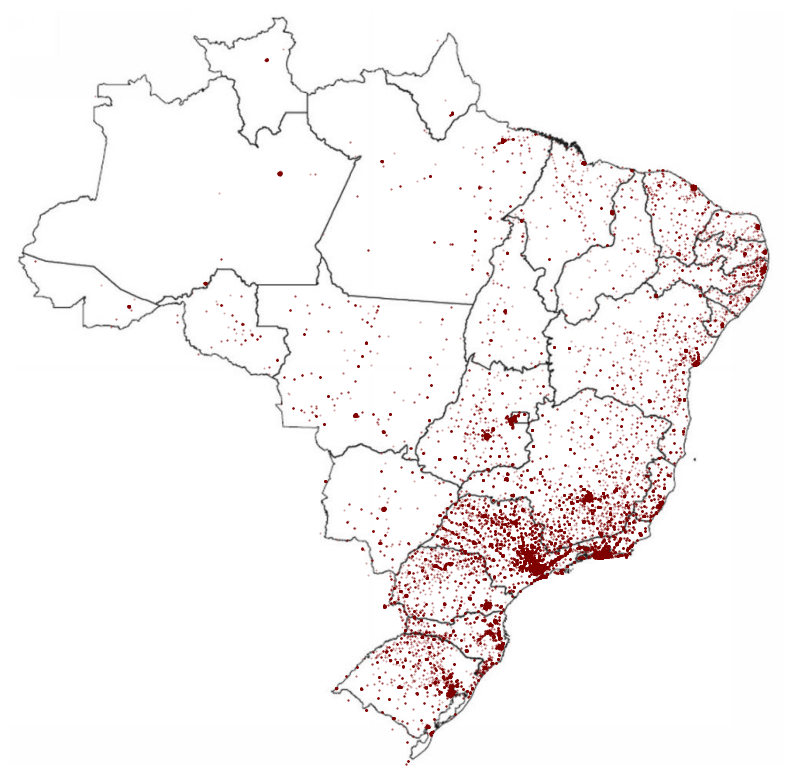

In [101]:
plot_brazil_map(customers_silver.drop_duplicates(subset='customer_unique_id'))

Banyak pelanggan datang dari negara bagian tenggara dan selatan.

### Jumlah pembelian tiap bulan

In [89]:

monthly_df = all_data_df.resample(rule='M', on='order_approved_at').agg({
    "order_id": "size",
})
monthly_df

,order_id
order_approved_at,
2016-09-30,1
2016-10-31,265
2016-11-30,0
2016-12-31,1
2017-01-31,715
2017-02-28,1638
2017-03-31,2554
2017-04-30,2278
2017-05-31,3547


In [90]:
monthly_df.index

DatetimeIndex(['2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31',
               '2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
               '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31',
               '2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31'],
              dtype='datetime64[ns]', name='order_approved_at', freq=None)

In [91]:
monthly_df.index = monthly_df.index.strftime('%B') #mengubah format order_approved_at menjadi Tahun-Bulan
monthly_df = monthly_df.reset_index()
monthly_df.rename(columns={
    "order_id": "order_count",
}, inplace=True)
monthly_df

,order_approved_at,order_count
0,September,1
1,October,265
2,November,0
3,December,1
4,January,715
5,February,1638
6,March,2554
7,April,2278
8,May,3547
9,June,3143


In [92]:
monthly_df = monthly_df.sort_values('order_count').drop_duplicates('order_approved_at', keep='last')

In [93]:

month_mapping = {
    "January": 1,
    "February": 2,
    "March": 3,
    "April": 4,
    "May": 5,
    "June": 6,
    "July": 7,
    "August": 8,
    "September": 9,
    "October": 10,
    "November": 11,
    "December": 12
}

monthly_df["month_numeric"] = monthly_df["order_approved_at"].map(month_mapping)
monthly_df = monthly_df.sort_values("month_numeric")
monthly_df = monthly_df.drop("month_numeric", axis=1)

In [94]:
monthly_df

,order_approved_at,order_count
16,January,6991
17,February,6536
18,March,7083
19,April,6639
20,May,6940
21,June,6094
22,July,6047
23,August,6504
12,September,4170
13,October,4441


In [95]:
monthly_df[monthly_df['order_count'] == monthly_df['order_count'].max()]['order_approved_at'].values[0]

'November'

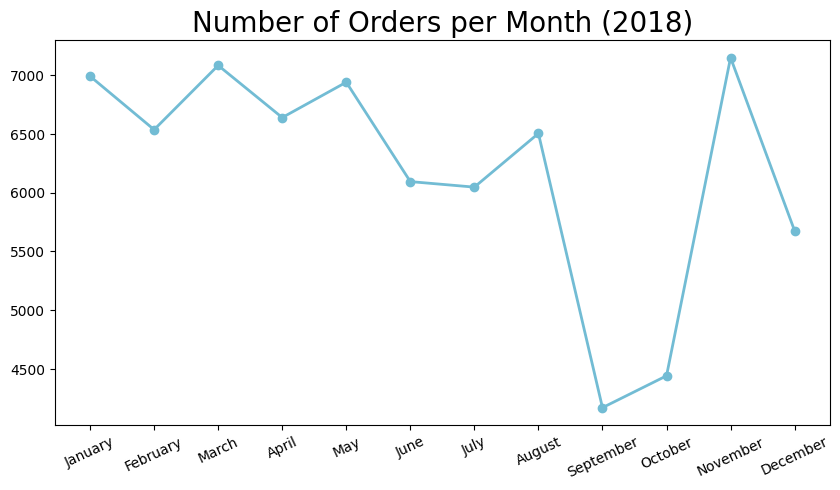

In [96]:
plt.figure(figsize=(10, 5))
plt.plot(
    monthly_df["order_approved_at"],
    monthly_df["order_count"],
    marker='o', 
    linewidth=2,
    color="#72BCD4"
)
plt.title("Number of Orders per Month (2018)", loc="center", fontsize=20)
plt.xticks(fontsize=10, rotation=25)
plt.yticks(fontsize=10)
plt.show()

## Conclusion

* Produk mana yang paling banyak terjual? Apakah mereka mendapat untung lebih banyak dari produk yang murah atau dari produk yang mahal?
>Olist menghasilkan lebih banyak uang bukan dengan menjual banyak produk, tetapi **dengan menjual banyak produk yang berbeda, masing-masing dengan probabilitas rendah dan dalam kisaran 50-500 R$.**
* Lokasi geografis mana yang memiliki pelanggan terbanyak?
>Berdasarkan grafik yang telah dibuat, **terdapat lebih banyak pelanggan di bagian tenggara dan selatan**. Informasi lainnya, ada lebih banyak pelanggan di kota-kota yang merupakan ibu kota (São Paulo, Rio de Janeiro, Porto Alegre, dan lainnya).

* Bagaimana data pembelian order setiap bulan?
> data pembelian customer bernilai **fluaktif**,dengan kata lain nilai dari pembelian customer setiap bulan ada kenaikan dan terkadang ada penurunan,yang dimana berdasarkan data terkait **puncak pembelian maksimum customer** ada pada bulan **November** dan **puncak pembelian minimum customer** ada pada bulan **September**
